In [1]:
''' Test data loading and other functions. '''
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from mlflux.datafunc import applybulk
from mlflux.plotting import comparison

### PSD

In [ ]:
''' PSD - loading and processing. '''
ds = xr.load_dataset('../MLFLUXES/data/fluxes_all_cruises_compilation.nc')

# Remove nan
ds_psd = ds.dropna(dim="time", how="any", 
                   subset=['taucx','taucy','hsc','hlc','U','tsnk','ta','qa'])
print('Number of samples: %g' %(len(ds_psd.U.values)))

# Rename fields (dummy2 is relative humidity)
ds_psd = ds_psd.rename_vars({'tsnk':'tsea','ta':'tair','qa':'qair','dummy2':'rh'})
# Drop the not used variables
ds_psd = ds_psd[['taucx','taucy','hsc','hlc','U','tsea','tair','qair',
                 'rh', 'pcode','zu','zt','zq']]

# A few more adjustments that are data set specific 
ds_psd['qair'] = ds_psd['qair']/1000. # Make it into unit kg/kg
ds_psd['hsc'] = -ds_psd['hsc'] # Heat flux is positive when it's from air to ocean
ds_psd['hlc'] = -ds_psd['hlc']

# Compute bulk using COARE3.6 and then append to dataset
# Here when zq and zt are different height we use zt
ds_psd = applybulk(ds_psd, algo='coare3p6')

In [ ]:
# Quick check that the bulk looks reasonable and signs agree
# Also evaluate how COARE is doing 

fig, axes = plt.subplots(1,3,figsize=[14,3],constrained_layout=True)
ax1 = comparison(ds_psd, axes[0], xplot='U', yplot='tau')
ax2 = comparison(ds_psd, axes[1], xplot='U', yplot='hs')
ax3 = comparison(ds_psd, axes[2], xplot='U', yplot='hl')

fig, axes = plt.subplots(1,3,figsize=[14,3],constrained_layout=True)
ax1 = comparison(ds_psd, axes[0], xplot='Tdiff', yplot='tau')
ax2 = comparison(ds_psd, axes[1], xplot='Tdiff', yplot='hs')
ax3 = comparison(ds_psd, axes[2], xplot='Tdiff', yplot='hl')

fig, axes = plt.subplots(1,3,figsize=[14,3],constrained_layout=True)
ax1 = comparison(ds_psd, axes[0], xplot='rh', yplot='tau')
ax2 = comparison(ds_psd, axes[1], xplot='rh', yplot='hs')
ax3 = comparison(ds_psd, axes[2], xplot='rh', yplot='hl')

Training samples: 7528
Validating samples: 879
Testing samples: 1666


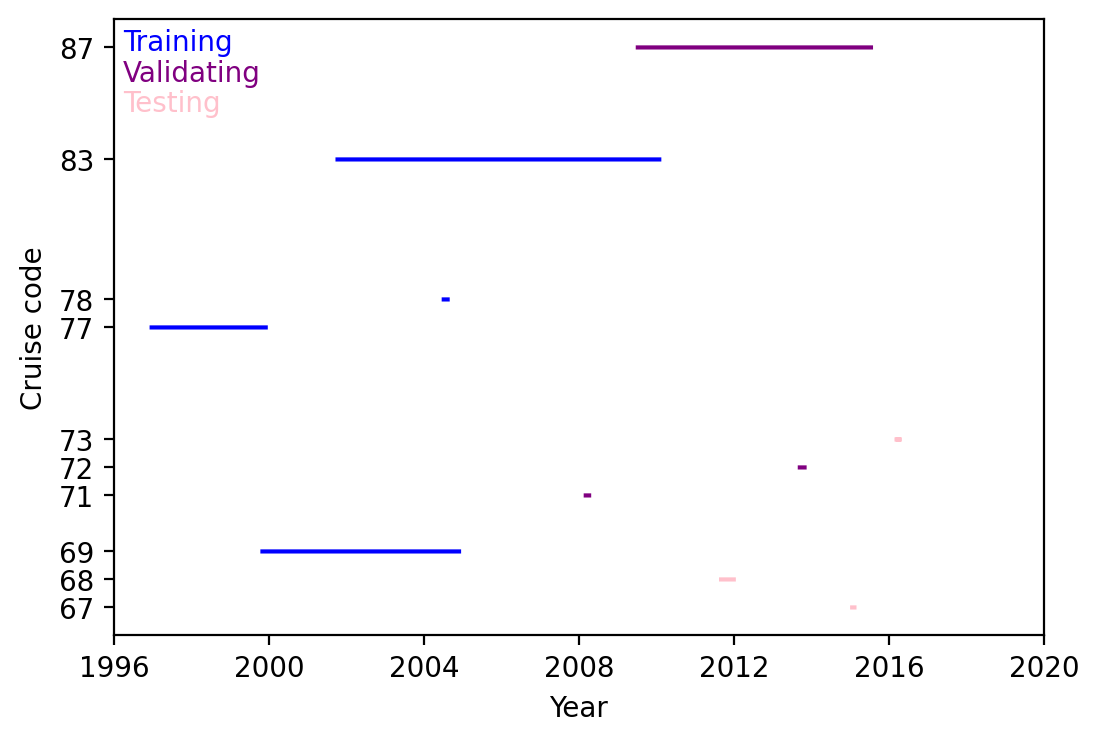

In [25]:
from mlflux.datafunc import data_split_psd, assemble_var
train, valid, test = data_split_psd(ds_psd, split=[[77, 69, 83, 78], [87, 72, 71], [68, 67, 73]],
                                    PLOT=True, XVIS='time')
X_train, Y_train = assemble_var(train, choice='U_Tdiff_rh')
X_valid, Y_valid = assemble_var(valid, choice='U_Tdiff_rh')
X_test, Y_test = assemble_var(test, choice='U_Tdiff_rh')

### Atomic

In [19]:
''' Atomic - loading and processing '''
ds = xr.open_dataset('../../data/WHOI/EUREC4A_ATOMIC_RonBrown_10min_nav_met_sea_flux_20200109-20200212_v1.3.nc')
ds

<xarray.Dataset>
Dimensions:                           (trajectory: 1, obs: 5040)
Coordinates:
  * trajectory                        (trajectory) int32 -2147483647
    time                              (obs, trajectory) datetime64[ns] ...
    lat                               (obs, trajectory) float64 ...
    lon                               (obs, trajectory) float64 ...
    zu                                (obs, trajectory) float64 ...
    ztq                               (obs, trajectory) float64 ...
    zsea                              (obs, trajectory) float64 ...
    zu_ship                           (obs, trajectory) float64 ...
    ztq_ship                          (obs, trajectory) float64 ...
    zsea_ship                         (obs, trajectory) float64 ...
Dimensions without coordinates: obs
Data variables: (12/97)
    RonBrown                          (trajectory) |S1 ...
    crs                               float64 ...
    rain_instrument                   (trajectory) |S1 ...
    shortwave_radiation_instrument_1  (trajectory) |S1 ...
    shortwave_radiation_instrument_2  (trajectory) |S1 ...
    longwave_radiation_instrument_1   (trajectory) |S1 ...
    ...                                ...
    ch                                (obs, trajectory) float64 ...
    evap                              (obs, trajectory) float64 ...
    rough_u                           (obs, trajectory) float64 ...
    rough_t                           (obs, trajectory) float64 ...
    rough_q                           (obs, trajectory) float64 ...
    gust                              (obs, trajectory) float64 ...
Attributes: (12/33)
    title:                     ATOMIC (Atlantic Tradewind Ocean Atmosphere Me...
    summary:                   The data come from two sources, the NOAA PSL s...
    keywords:                  Earth Science > Atmosphere > Atmospheric Press...
    keywords_vocabulary:       GCMD Earth Science Keywords. Version 8.6
    comment:                   The PSL data (variables without suffix) should...
    instrument:                In Situ Instruments from NOAA PSL and the perm...
    ...                        ...
    cdm_data_type:             Trajectory
    date_created:              2021-03-30T16:13:03Z
    date_modified:             2021-03-30T16:13:03Z
    standard_name_vocabulary:  CF Standard Name Table v41
    ncei_template_version:     NCEI_NetCDF_Trajectory_Template_v2.0
    Conventions:               CF-1.6, ACDD-1.3

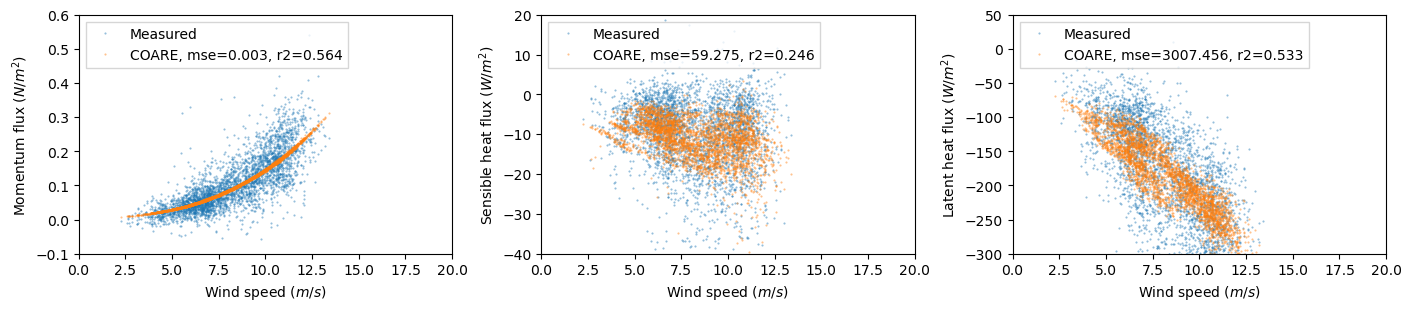

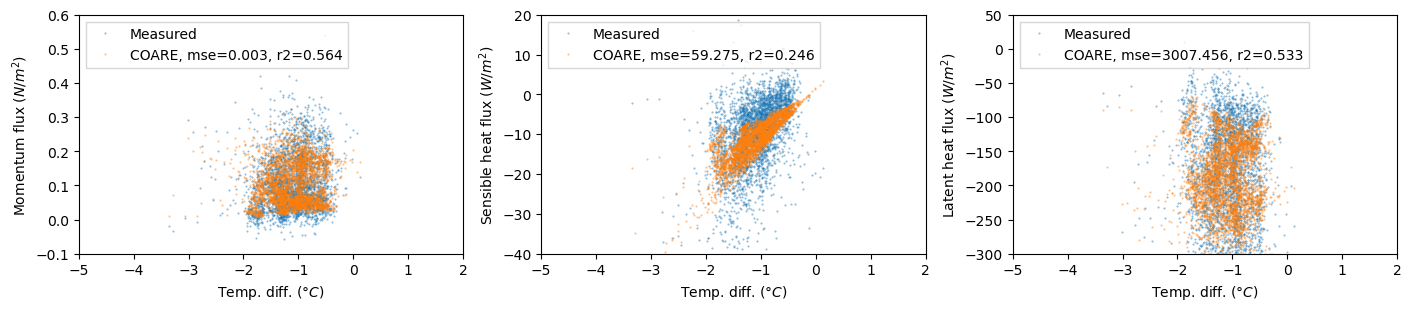

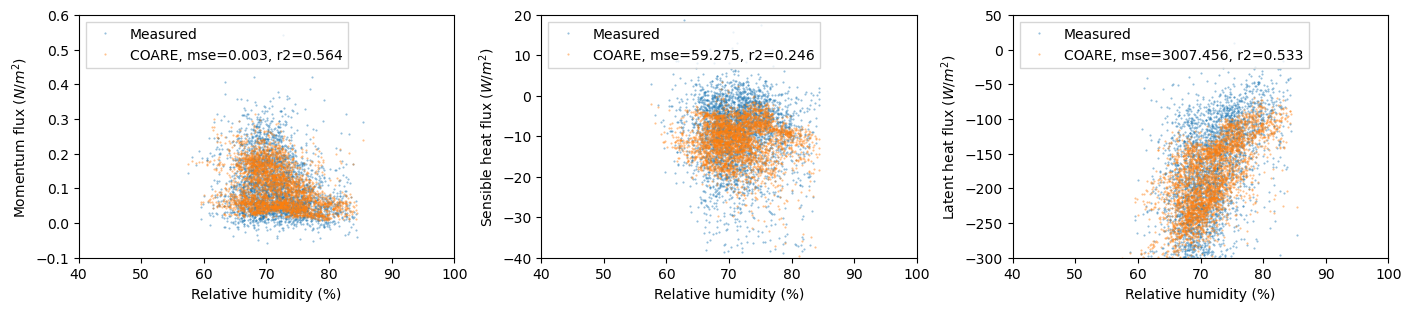

In [20]:
# Quick check that the bulk looks reasonable and signs agree
# Also evaluate how COARE is doing 

fig, axes = plt.subplots(1,3,figsize=[14,3],constrained_layout=True)
ax1 = comparison(ds_atomic, axes[0], xplot='U', yplot='tau')
ax2 = comparison(ds_atomic, axes[1], xplot='U', yplot='hs')
ax3 = comparison(ds_atomic, axes[2], xplot='U', yplot='hl')

fig, axes = plt.subplots(1,3,figsize=[14,3],constrained_layout=True)
ax1 = comparison(ds_atomic, axes[0], xplot='Tdiff', yplot='tau')
ax2 = comparison(ds_atomic, axes[1], xplot='Tdiff', yplot='hs')
ax3 = comparison(ds_atomic, axes[2], xplot='Tdiff', yplot='hl')

fig, axes = plt.subplots(1,3,figsize=[14,3],constrained_layout=True)
ax1 = comparison(ds_atomic, axes[0], xplot='rh', yplot='tau')
ax2 = comparison(ds_atomic, axes[1], xplot='rh', yplot='hs')
ax3 = comparison(ds_atomic, axes[2], xplot='rh', yplot='hl')

### Determine the cruise subsets for testing and training, check distribution of fluxes

Training samples: 7005
Validating samples: 3068
Testing samples: 3068


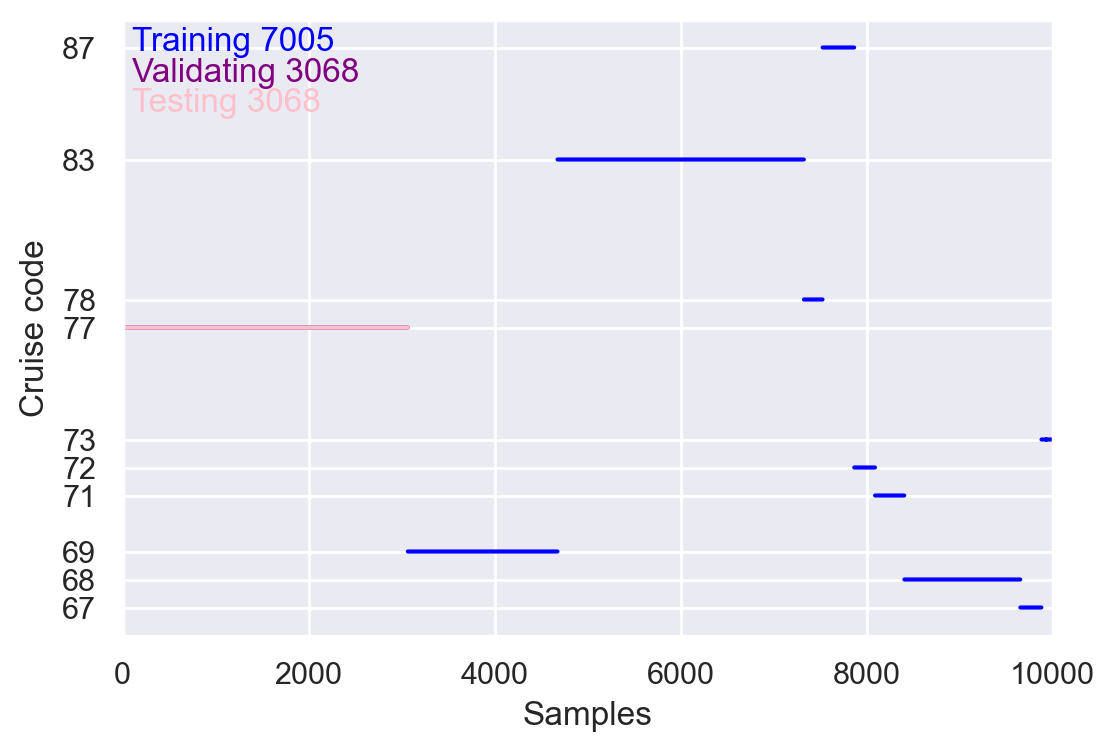

In [67]:
psd = xr.load_dataset('../../data/Processed/psd.nc')
from mlflux.datafunc import data_split_psd

# 77, 69, 83, 78, 87, 72, 71, 68, 67, 73
split1 = [[69, 83, 78, 87, 72, 71, 68, 67, 73], [77], [77]]
split2 = [[77, 83, 78, 87, 72, 71, 68, 67, 73], [69], [69]]
split3 = [[77, 69, 78, 87, 72, 71, 68, 67, 73], [83], [83]]
split4 = [[77, 69, 83, 78, 68, 67, 73], [87, 72, 71], [87, 72, 71]]
split5 = [[77, 69, 83, 78, 87, 72, 71, 67, 73], [68], [68]]
split6 = [[77, 69, 83, 68, 87, 72, 71], [78, 67, 73], [78, 67, 73]]
split_ensem = [split1, split2, split3, split4, split5, split6]

training_ds, validating_ds, testing_ds = data_split_psd(psd, split=split1, PLOT=True, XVIS='samples')

Text(60.625, 0.5, '$Q_H$ [W/m$^2$]')

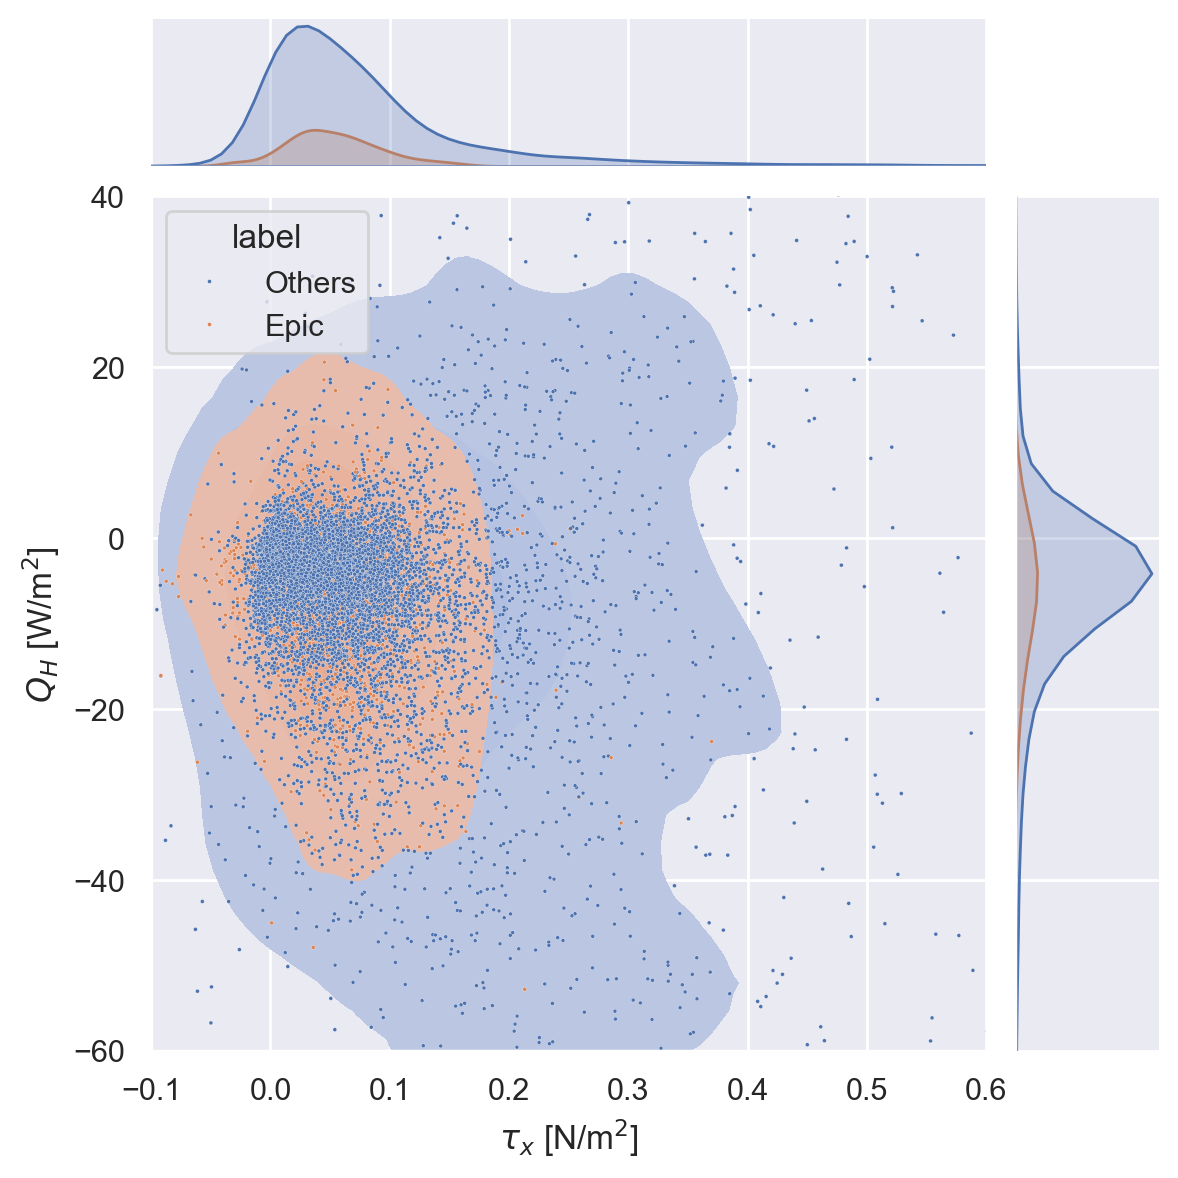

In [43]:
import seaborn as sns

ds = xr.load_dataset('../../data/Processed/psd_wave.nc')
# ds['label'] = xr.where(ds.pcode == 83, 'Metz', 'Others')
ds['label'] = xr.where(ds.pcode == 69, 'Epic', 'Others')
# pal = dict(Epic="pink", Others="gray")

sns.set_theme(rc={"figure.figsize":(6, 8), "figure.dpi": 200})

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”

g = sns.jointplot(data=ds, x='taucx', y='hsc', kind='kde', xlim=[-0.1,0.6], ylim=[-60,40], hue='label', fill=True)
g.plot_joint(sns.scatterplot, marker='o', s=2)

# Set labels and title
ax = plt.gca()
ax.set_xlabel(r'$\tau_x$ [N/m$^2$]')
ax.set_ylabel('$Q_H$ [W/m$^2$]')


Text(70.125, 0.5, '$Q_H$ [W/m$^2$]')

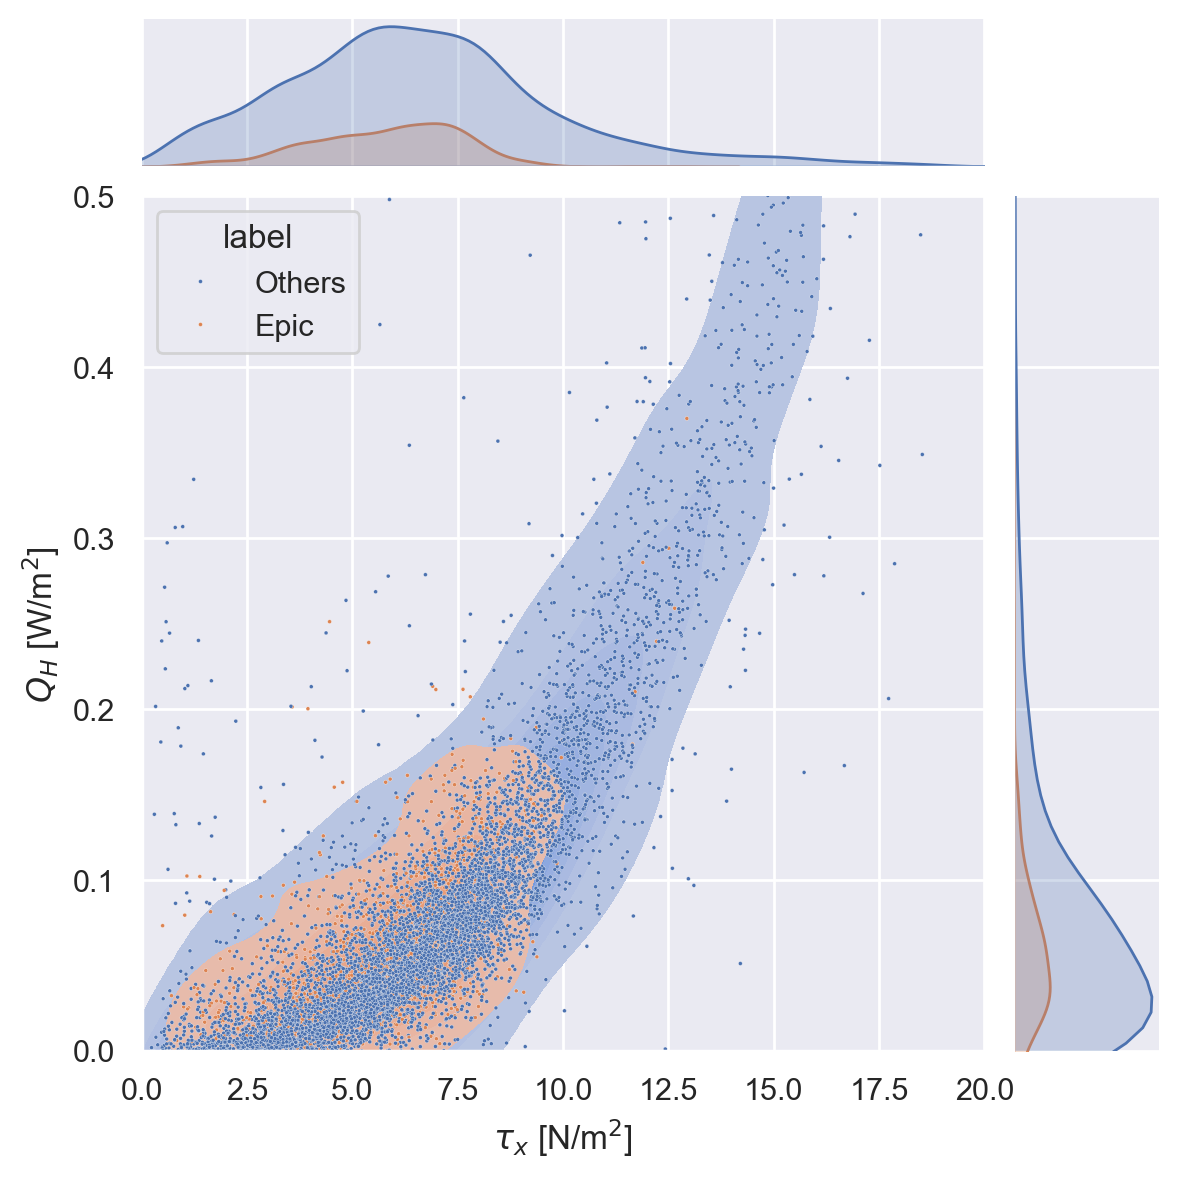

In [44]:
import seaborn as sns

ds = xr.load_dataset('../../data/Processed/psd_wave.nc')
# ds['label'] = xr.where(ds.pcode == 83, 'Metz', 'Others')
ds['label'] = xr.where(ds.pcode == 69, 'Epic', 'Others')
# pal = dict(Epic="pink", Others="gray")

sns.set_theme(rc={"figure.figsize":(6, 8), "figure.dpi": 200})

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”

g = sns.jointplot(data=ds, x='U', y='taucx', kind='kde', xlim=[0,20], ylim=[0,0.5], hue='label', fill=True)
g.plot_joint(sns.scatterplot, marker='o', s=2)

# Set labels and title
ax = plt.gca()
ax.set_xlabel(r'$\tau_x$ [N/m$^2$]')
ax.set_ylabel('$Q_H$ [W/m$^2$]')


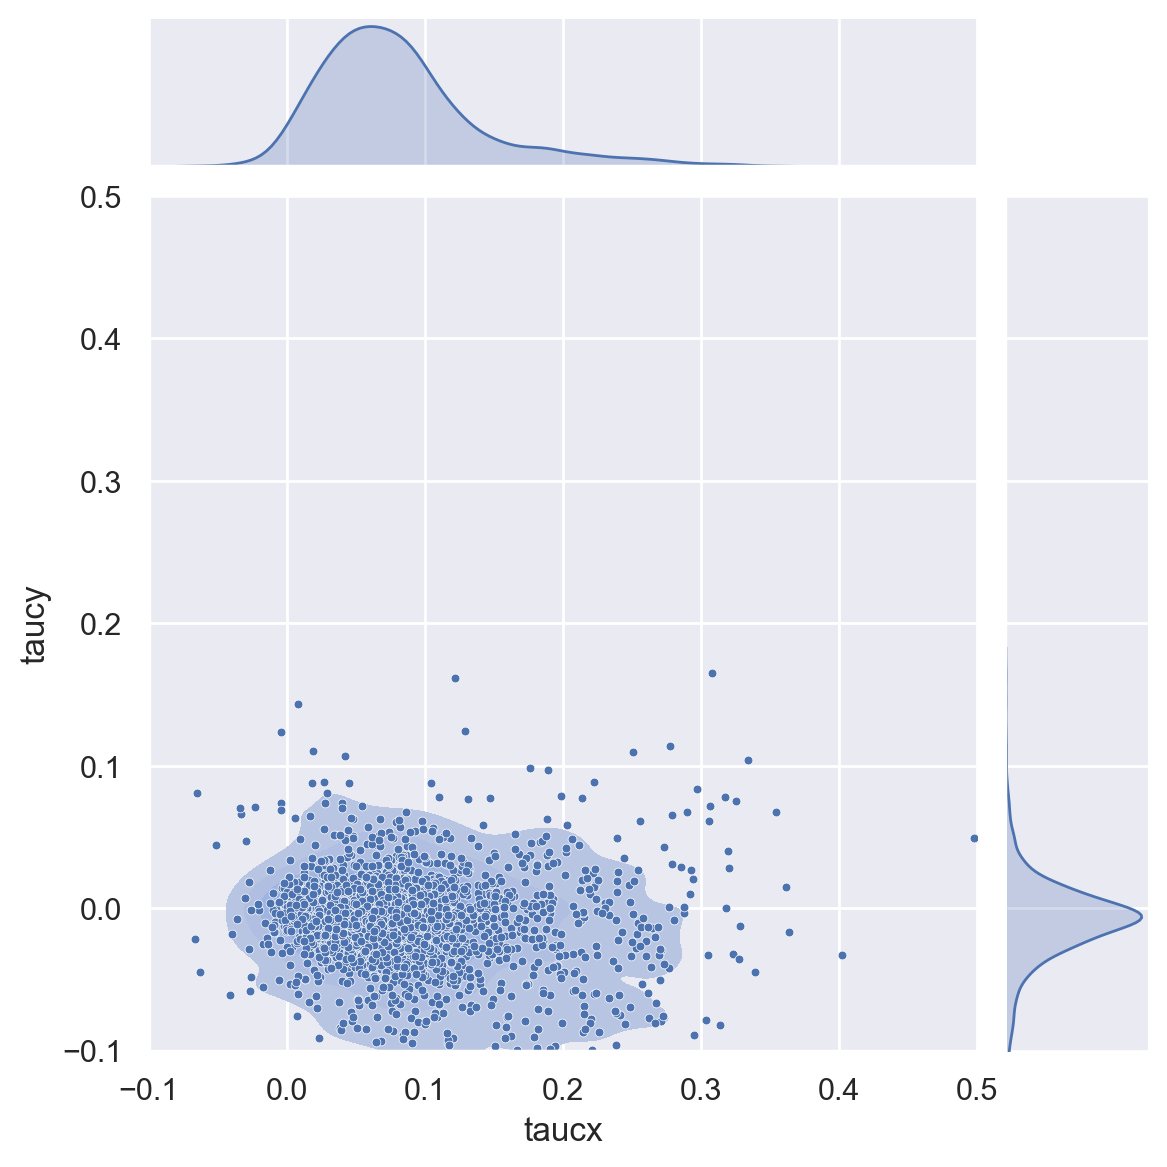

In [17]:
import seaborn as sns

ds = psd.where(psd.pcode.isin([83]))

sns.set_theme(rc={"figure.figsize":(3, 4)})
sns.set_theme(rc={"figure.dpi": 200})

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
g = sns.jointplot(data=ds, x='taucx', y='taucy', kind='kde', xlim=[-0.1,0.5], ylim=[-0.1,0.5], fill=True,)
g.plot_joint(sns.scatterplot, marker='o', s=10)


### Wave condition distribution

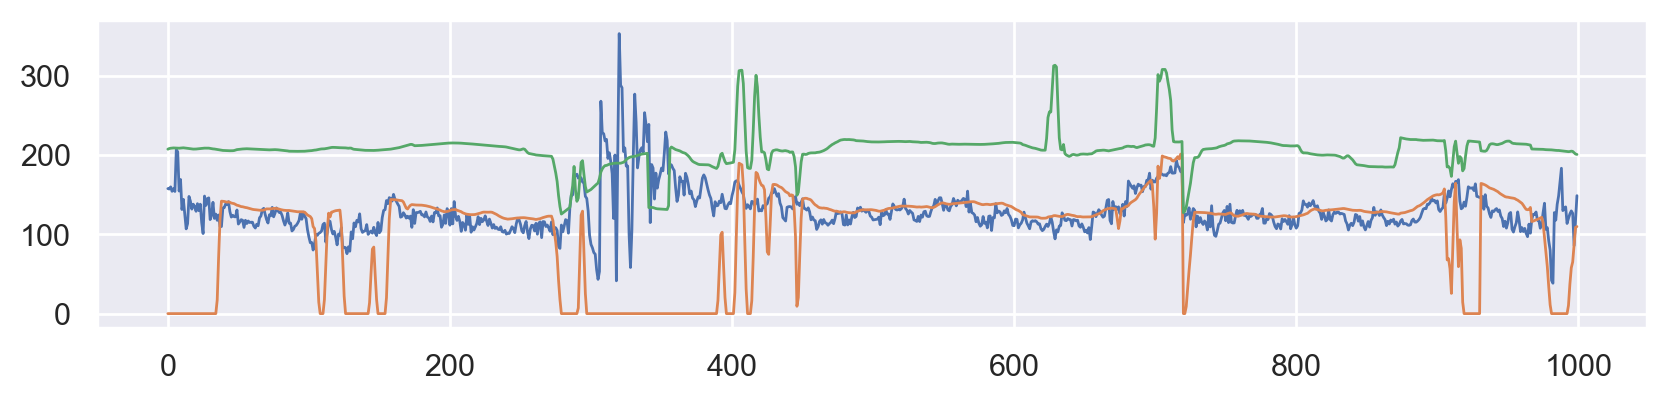

In [53]:
ds = xr.load_dataset('../../data/Processed/psd_wave.nc')
fig = plt.figure(figsize=[10,2])
pcode = 83
plt.plot(ds.wdir.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
plt.plot(ds.pdir0.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
plt.plot(ds.pdir1.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
## To-do: compute wave direction

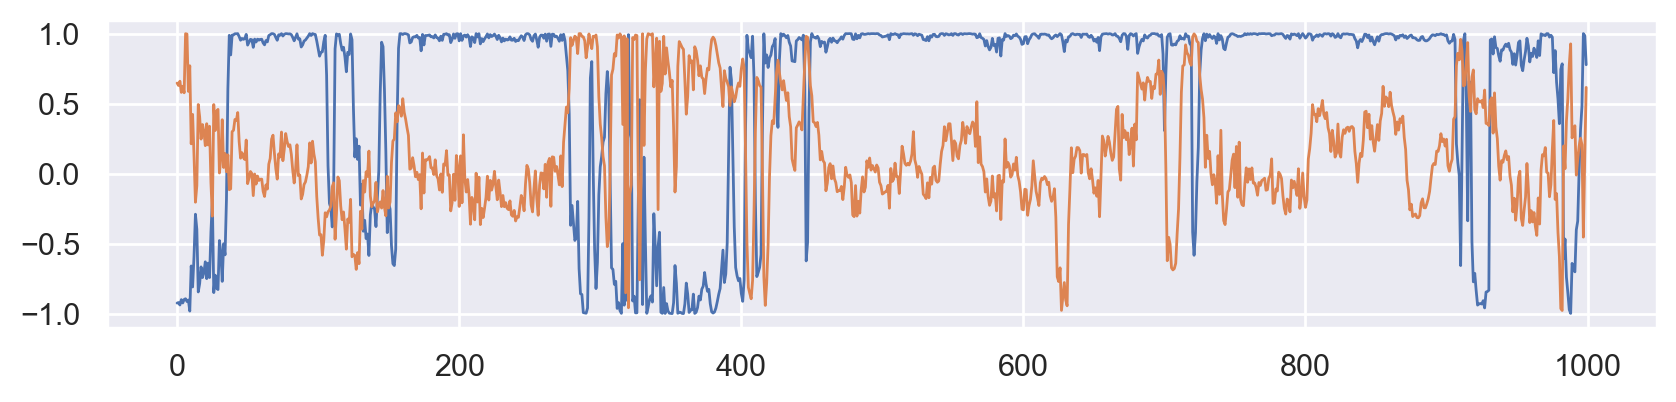

In [61]:
fig = plt.figure(figsize=[10,2])
pcode = 83
ds['cos0'] = np.cos(np.deg2rad(ds.wdir-ds.pdir0))
ds['cos1'] = np.cos(np.deg2rad(ds.wdir-ds.pdir1))
temp0 = ds['cos0']*ds['phs0']
temp1 = ds['cos1']*ds['phs1']
plt.plot(ds['cos0'].where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
plt.plot(ds['cos1'].where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
# plt.plot(temp0.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
# plt.plot(temp1.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)

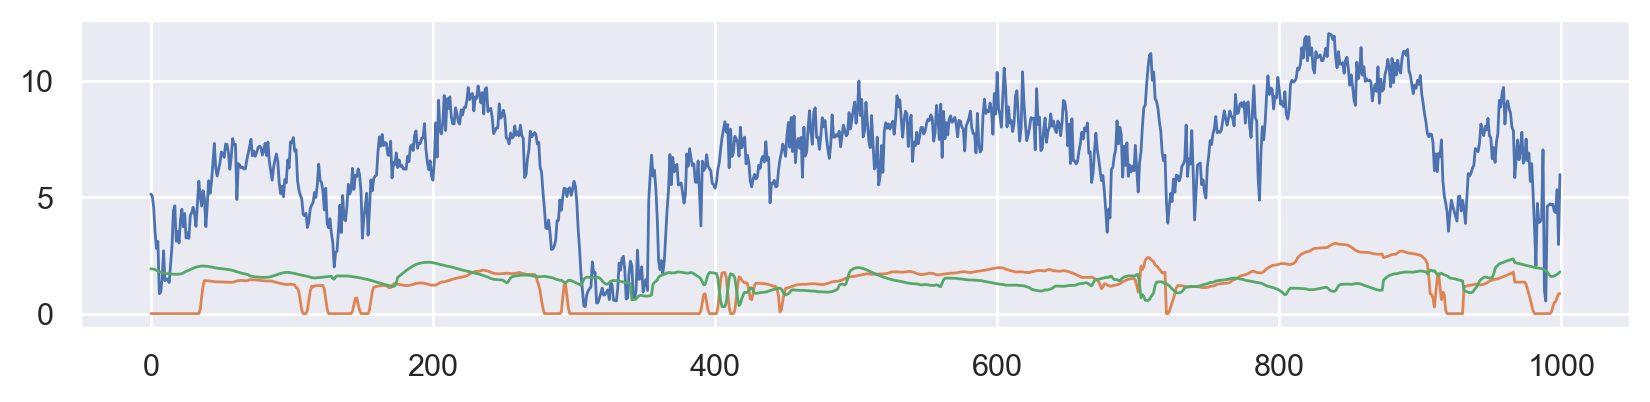

In [56]:
fig = plt.figure(figsize=[10,2])
pcode = 83
plt.plot(ds.U.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
plt.plot(ds.phs0.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
plt.plot(ds.phs1.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
# plt.plot(ds.pdir1.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)

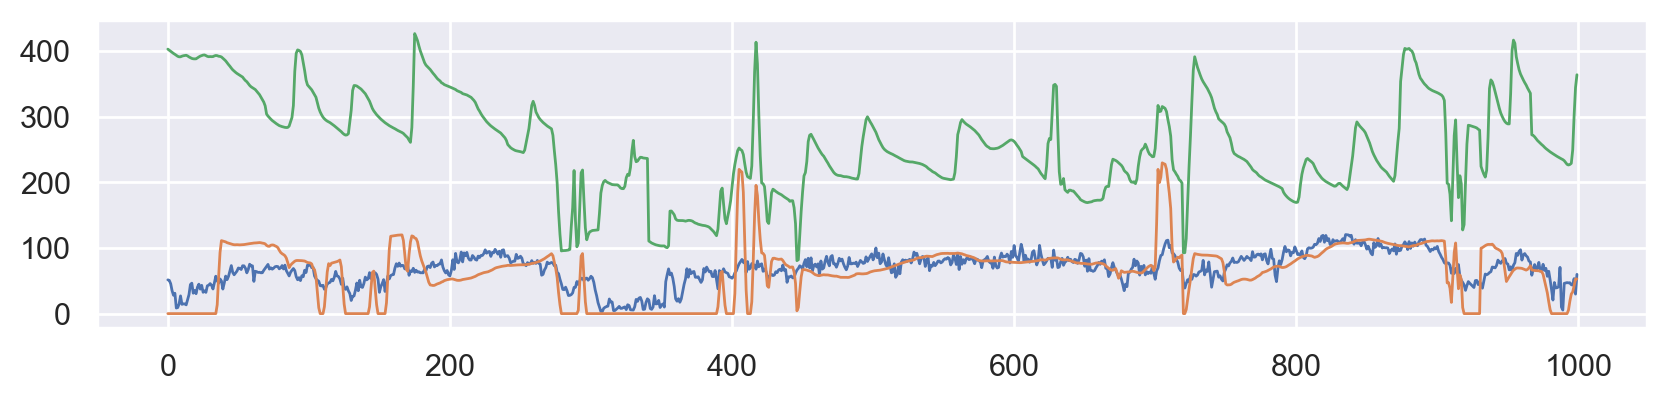

In [63]:
fig = plt.figure(figsize=[10,2])
pcode = 83
plt.plot(ds.U.where(ds.pcode==pcode,drop=True).values[:1000]*10, linewidth=1)
plt.plot(ds.plp0.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)
plt.plot(ds.plp1.where(ds.pcode==pcode,drop=True).values[:1000], linewidth=1)

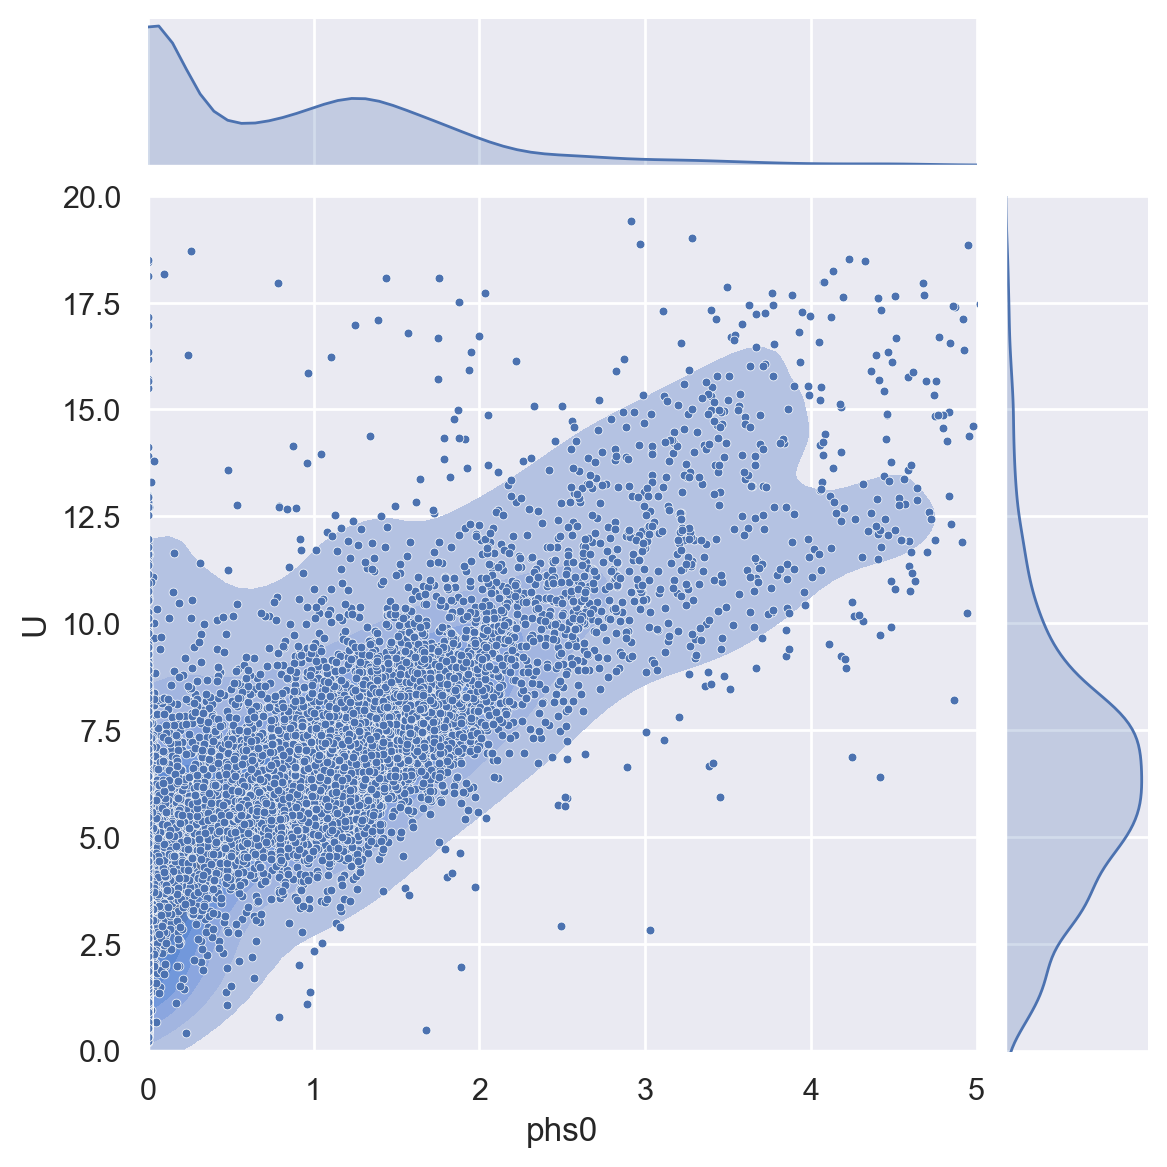

In [16]:
import seaborn as sns

# ds = ds.where(ds.pcode.isin([77]))

sns.set_theme(rc={"figure.figsize":(3, 4)})
sns.set_theme(rc={"figure.dpi": 200})

# Custom the inside plot: options are: “scatter” | “reg” | “resid” | “kde” | “hex”
g = sns.jointplot(data=ds, x='phs0', y='U', kind='kde', xlim=[0,5], ylim=[0,20], fill=True)
g.plot_joint(sns.scatterplot, marker='o', s=10)

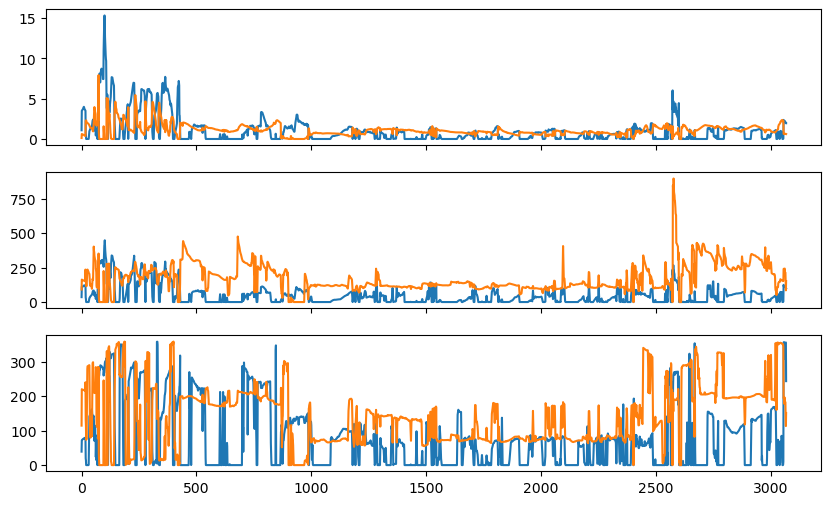

In [3]:
fig,axes = plt.subplots(3,1,figsize=[10,6],sharex=True)
pcode = 77
ax = axes[0]
ax.plot(ds.where(ds.pcode==pcode).phs0.values)
ax.plot(ds.where(ds.pcode==pcode).phs1.values)
ax = axes[1]
ax.plot(ds.where(ds.pcode==pcode).plp0.values)
ax.plot(ds.where(ds.pcode==pcode).plp1.values)
ax = axes[2]
ax.plot(ds.where(ds.pcode==pcode).pdir0.values)
ax.plot(ds.where(ds.pcode==pcode).pdir1.values)